In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Índice

1. [Chequeo de nulos](#chequeo-de-nulos)
2. [Valores duplicados](#valores-duplicados)
3. [Valores faltantes](#valores-faltantes)
4. [Tipos de datos](#tipos-de-datos)
5. [Análisis Outlier](#analisis-outlier)
6. [Análisis estadístico de datos](#analisis-estadistico-de-datos)
7. [Análisis de correlaciones bi y multivariado](#analisis-de-correlaciones-bi-y-multivariado)

---

In [33]:
df_maps = pd.read_csv('../data_local/df_maps.csv')

### Chequeo de nulos

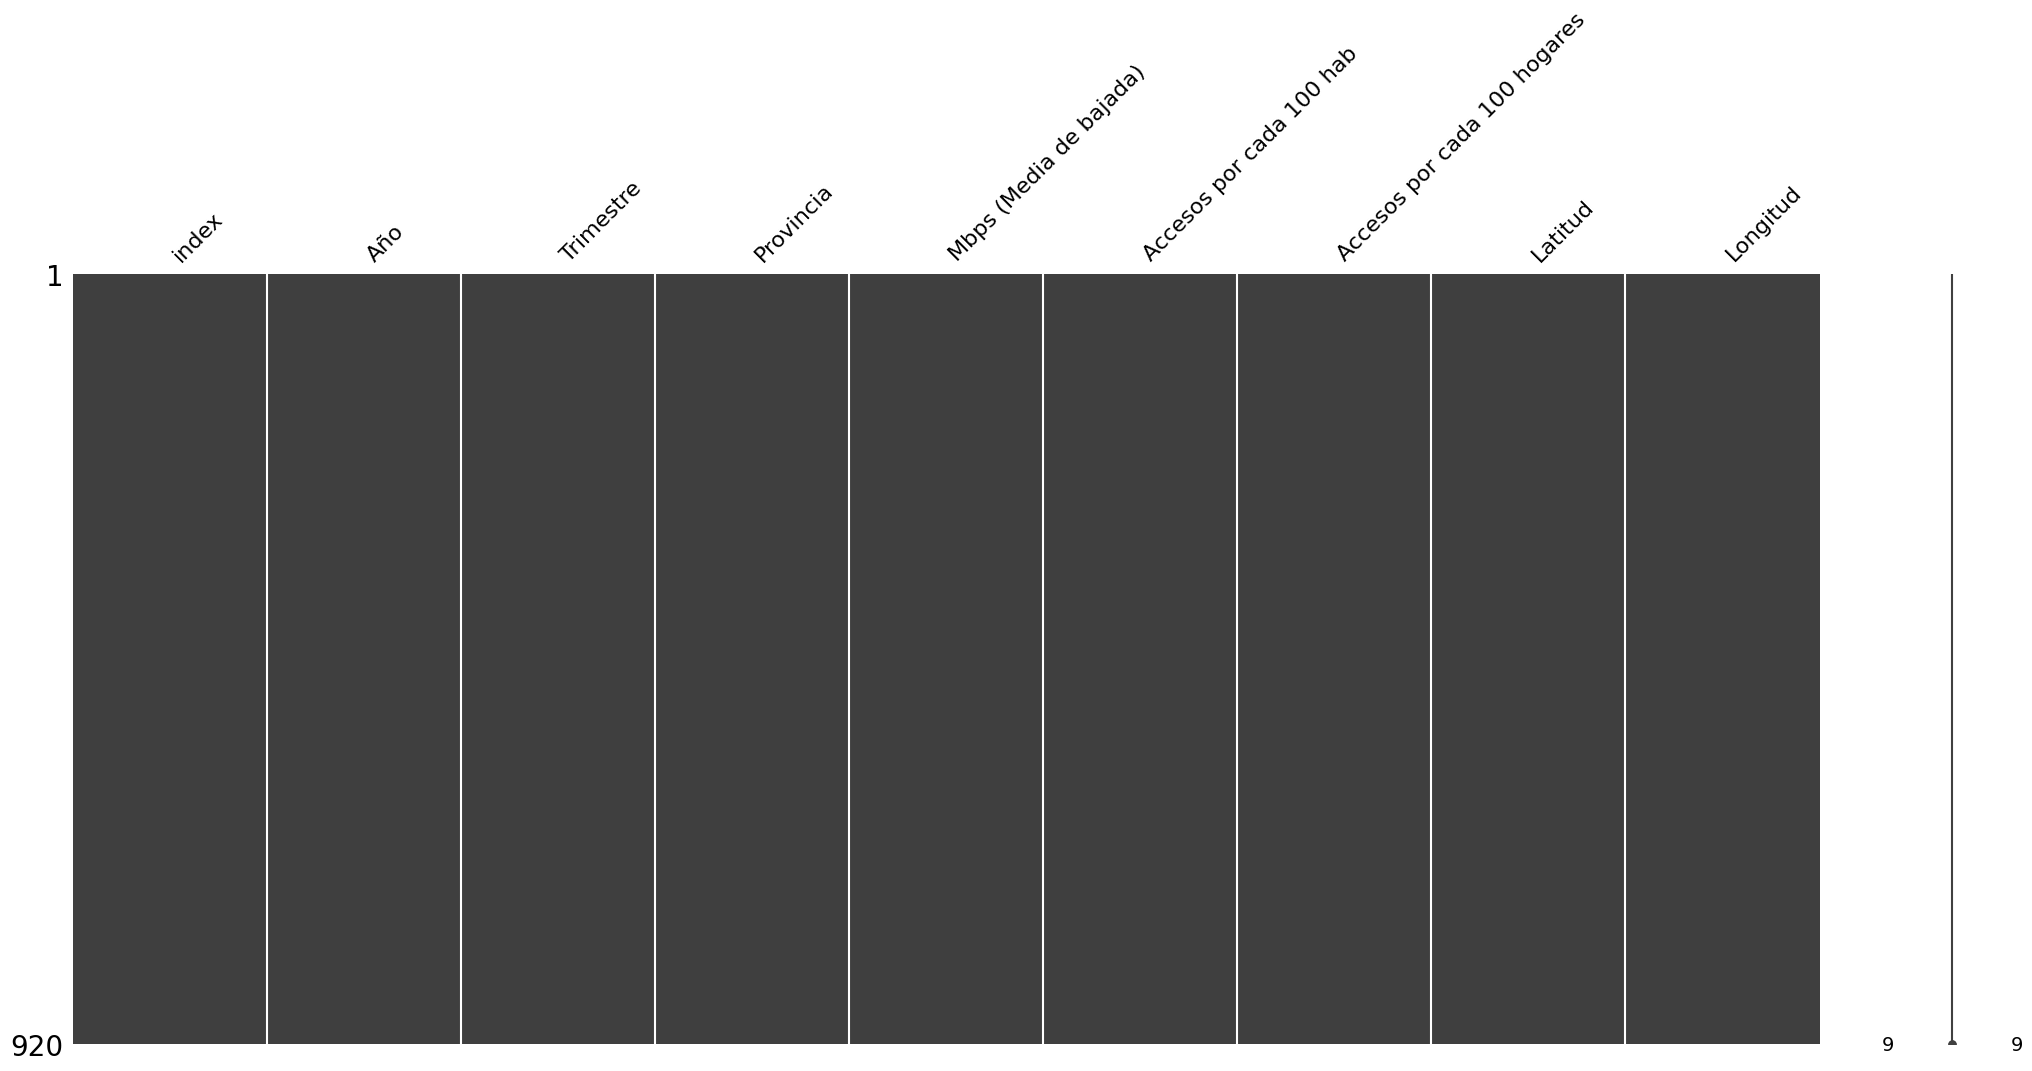

In [36]:
msno.matrix(df_maps)
#Se eliminaron unos cuantos nulos en la latitud y la longitud
df_maps = df_maps.dropna(subset=['Longitud','Latitud'])

### Valores duplicados

In [35]:
#No se tienen valores duplicados
duplicados_df_maps = df_maps[df_maps.duplicated()]
print(duplicados_df_maps)

Empty DataFrame
Columns: [index, Año, Trimestre, Provincia, Mbps (Media de bajada), Accesos por cada 100 hab, Accesos por cada 100 hogares, Latitud, Longitud]
Index: []


### Valores faltantes

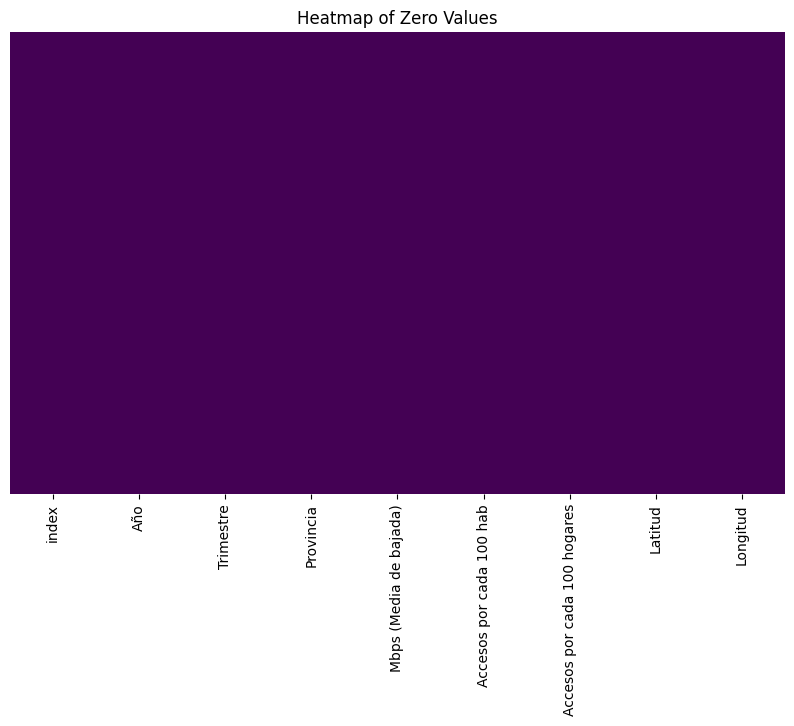

In [37]:
#No se tienen valores en 0
def plot_zeros(data):
    zeros = (data == 0).astype(int)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.heatmap(zeros, cbar=False, cmap='viridis', yticklabels=False)
    ax.set_title('Heatmap of Zero Values')
    plt.show()

# Visualizar los valores 0
plot_zeros(df_maps)

### Tipos de datos

In [38]:
print(df_maps.dtypes)

index                             int64
Año                               int64
Trimestre                         int64
Provincia                        object
Mbps (Media de bajada)          float64
Accesos por cada 100 hab        float64
Accesos por cada 100 hogares    float64
Latitud                         float64
Longitud                        float64
dtype: object


In [16]:
df_maps.columns

Index(['index', 'Provincia', 'Mbps (Media de bajada)',
       'Accesos por cada 100 hab', 'Accesos por cada 100 hogares', 'Latitud',
       'Longitud'],
      dtype='object')

### Analisis Outlier

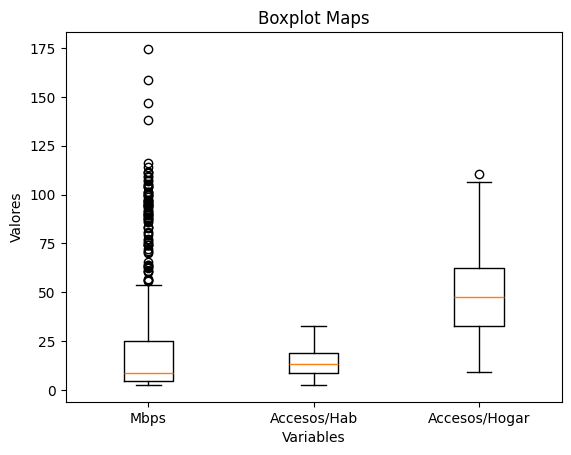

In [39]:
plt.boxplot([df_maps['Mbps (Media de bajada)'],
            df_maps['Accesos por cada 100 hab'],
            df_maps['Accesos por cada 100 hogares']])
plt.xticks([1, 2, 3], ['Mbps', 'Accesos/Hab', 'Accesos/Hogar']) 
plt.xlabel('Variables')  # Etiqueta del eje x
plt.ylabel('Valores')  # Etiqueta del eje y
plt.title('Boxplot Maps')  # Título del gráfico
plt.show()

In [40]:
Q1  = df_maps['Mbps (Media de bajada)'].quantile(0.25)
print('Primer Cuartil: ', Q1)
Q3  = df_maps['Mbps (Media de bajada)'].quantile(0.75)
print('Tercer Cuartil: ', Q3)
IQR = Q3 - Q1
print('Rango Intercuartil: ', IQR)
Mediana = df_maps['Mbps (Media de bajada)'].median()
print('Mediana: ', Mediana)
Valor_minimo = df_maps['Mbps (Media de bajada)'].min()
print('Valor minimo: ', Valor_minimo)
Valor_maximo = df_maps['Mbps (Media de bajada)'].max()
print('Valor maximo: ', Valor_maximo)
BI_calculado = (Q1 - 1.5 * IQR)
print('Bigote inferior: ', BI_calculado)
BS_calculado = (Q1 + 1.5 * IQR)
print('Bigote superior: ', BS_calculado)

Primer Cuartil:  4.5594060058521855
Tercer Cuartil:  24.89788519776705
Rango Intercuartil:  20.338479191914864
Mediana:  8.577329514118048
Valor minimo:  2.573729210919676
Valor maximo:  174.59
Bigote inferior:  -25.94831278202011
Bigote superior:  35.06712479372448


In [41]:
Q1  = df_maps['Accesos por cada 100 hab'].quantile(0.25)
print('Primer Cuartil: ', Q1)
Q3  = df_maps['Accesos por cada 100 hab'].quantile(0.75)
print('Tercer Cuartil: ', Q3)
IQR = Q3 - Q1
print('Rango Intercuartil: ', IQR)
Mediana = df_maps['Accesos por cada 100 hab'].median()
print('Mediana: ', Mediana)
Valor_minimo = df_maps['Accesos por cada 100 hab'].min()
print('Valor minimo: ', Valor_minimo)
Valor_maximo = df_maps['Accesos por cada 100 hab'].max()
print('Valor maximo: ', Valor_maximo)
BI_calculado = (Q1 - 1.5 * IQR)
print('Bigote inferior: ', BI_calculado)
BS_calculado = (Q1 + 1.5 * IQR)
print('Bigote superior: ', BS_calculado)

Primer Cuartil:  8.668890722484266
Tercer Cuartil:  19.041351317730268
Rango Intercuartil:  10.372460595246002
Mediana:  13.07505938173163
Valor minimo:  2.684668505334274
Valor maximo:  32.93
Bigote inferior:  -6.889800170384737
Bigote superior:  24.227581615353266


In [42]:
Q1  = df_maps['Accesos por cada 100 hogares'].quantile(0.25)
print('Primer Cuartil: ', Q1)
Q3  = df_maps['Accesos por cada 100 hogares'].quantile(0.75)
print('Tercer Cuartil: ', Q3)
IQR = Q3 - Q1
print('Rango Intercuartil: ', IQR)
Mediana = df_maps['Accesos por cada 100 hogares'].median()
print('Mediana: ', Mediana)
Valor_minimo = df_maps['Accesos por cada 100 hogares'].min()
print('Valor minimo: ', Valor_minimo)
Valor_maximo = df_maps['Accesos por cada 100 hogares'].max()
print('Valor maximo: ', Valor_maximo)
BI_calculado = (Q1 - 1.5 * IQR)
print('Bigote inferior: ', BI_calculado)
BS_calculado = (Q1 + 1.5 * IQR)
print('Bigote superior: ', BS_calculado)

Primer Cuartil:  32.60462330785211
Tercer Cuartil:  62.330251689722495
Rango Intercuartil:  29.725628381870386
Mediana:  47.55812081146656
Valor minimo:  9.347207842190002
Valor maximo:  110.49
Bigote inferior:  -11.983819264953468
Bigote superior:  77.19306588065768


Ubicamos los outliers

In [43]:
ubicacion_outliers = (df_maps['Mbps (Media de bajada)'] < BI_calculado) | (df_maps['Mbps (Media de bajada)'] > BS_calculado)
outliers = df_maps[ubicacion_outliers]
outliers = outliers.sort_values('Mbps (Media de bajada)')
lista_outliers = outliers['Mbps (Media de bajada)'].tolist()
print(outliers['Mbps (Media de bajada)'])

56      77.32
64      79.10
32      80.29
40      80.80
16      83.04
98      83.33
8       83.35
50      86.13
79      86.71
74      87.41
103     87.47
26      87.90
119     88.33
55      89.37
2       89.40
85      89.81
116     90.30
61      90.55
109     91.24
37      91.49
92      92.22
86      93.42
13      93.65
62      93.97
102     94.72
78      94.80
68      94.87
110     95.37
95      95.79
31      96.26
38      96.57
71      96.69
54      97.21
44      97.39
47      98.85
14      99.63
30      99.64
20      99.81
6      100.90
7      101.18
23     101.55
66     103.84
99     104.02
75     104.33
42     104.97
51     105.45
3      107.14
27     107.50
101    108.77
77     109.57
96     111.00
29     111.50
53     111.82
5      114.03
72     116.18
48     138.35
24     146.84
0      158.49
18     174.59
Name: Mbps (Media de bajada), dtype: float64


In [44]:
ubicacion_outliers = (df_maps['Accesos por cada 100 hab'] < BI_calculado) | (df_maps['Accesos por cada 100 hab'] > BS_calculado)
outliers = df_maps[ubicacion_outliers]
outliers = outliers.sort_values('Accesos por cada 100 hab')
lista_outliers = outliers['Accesos por cada 100 hab'].tolist()
print(outliers['Accesos por cada 100 hab'])

Series([], Name: Accesos por cada 100 hab, dtype: float64)


In [45]:
ubicacion_outliers = (df_maps['Accesos por cada 100 hogares'] < BI_calculado) | (df_maps['Accesos por cada 100 hogares'] > BS_calculado)
outliers = df_maps[ubicacion_outliers]
outliers = outliers.sort_values('Accesos por cada 100 hogares')
lista_outliers = outliers['Accesos por cada 100 hogares'].tolist()
print(outliers['Accesos por cada 100 hogares'])

227     77.260161
188     77.304585
286     77.349356
418     77.452694
144     77.580000
          ...    
18     102.070000
94     104.230000
46     105.950000
70     106.380000
22     110.490000
Name: Accesos por cada 100 hogares, Length: 105, dtype: float64


Estaba claro que habrian outliers, puesto que es normal que en una nación no se encuentre de manera uniforme las mismas velocidades en cada provincia. Si bien esto puede deberse a fallos tecnologicos por causas naturales como la interferencia, o algún tipo de deficiencia tecnologica se ha evidenciado que en la mayoria de los casos puede deberse a la situación economica por la que atraviesa la provincia y su densidad poblacional.

### Analisis estadisticos de datos

### Analisis de correlaciones multivariado